<a href="https://colab.research.google.com/github/Shahi77/Assignment01_Deep-Learning/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**21DCS025 - Shahi**

Assignment- 01   (CS-661)

1. Design a single unit perceptron for classification of a linearly separable binary dataset without using pre-defined models.

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, max_epochs=100):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.weights = None
        self.bias = None

    def step_function(self, x):
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for epoch in range(self.max_epochs):
            for i in range(len(X)):
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_pred = self.step_function(linear_output)
                error = y[i] - y_pred
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.step_function(x) for x in linear_output])


AND_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
AND_labels = np.array([0, 0, 0, 1])

OR_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
OR_labels = np.array([0, 1, 1, 1])

XOR_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
XOR_labels = np.array([0, 1, 1, 0])

# Train perceptron on AND dataset
perceptron = Perceptron(learning_rate=0.1, max_epochs=10)
print("Training on AND dataset:")
perceptron.fit(AND_data, AND_labels)
AND_predictions = perceptron.predict(AND_data)
print("Predictions:", AND_predictions)
print("Actual Labels:", AND_labels)

# Train perceptron on OR dataset
print("\nTraining on OR dataset:")
perceptron.fit(OR_data, OR_labels)
OR_predictions = perceptron.predict(OR_data)
print("Predictions:", OR_predictions)
print("Actual Labels:", OR_labels)

# Train perceptron on XOR dataset
print("\nTraining on XOR dataset:")
perceptron.fit(XOR_data, XOR_labels)
XOR_predictions = perceptron.predict(XOR_data)
print("Predictions:", XOR_predictions)
print("Actual Labels:", XOR_labels)


Training on AND dataset:
Predictions: [0 0 0 1]
Actual Labels: [0 0 0 1]

Training on OR dataset:
Predictions: [0 1 1 1]
Actual Labels: [0 1 1 1]

Training on XOR dataset:
Predictions: [1 1 0 0]
Actual Labels: [0 1 1 0]


**AND Dataset**: The perceptron correctly classifies all points.(linearly separable)

**OR Dataset**: The perceptron correctly classifies all points.(linearly separable)

**XOR Dataset**:The perceptron fails to classify the XOR dataset correctly.(not linearly separable)


2. Use the Perceptron from sklearn.

OR Data: Accuracy: 1.0
AND Data: Accuracy: 1.0
XOR Data: Accuracy: 0.5


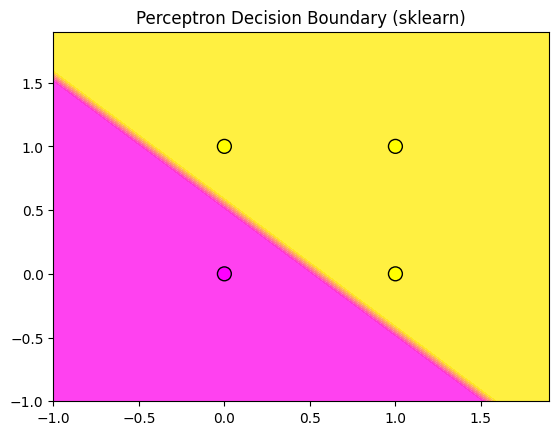

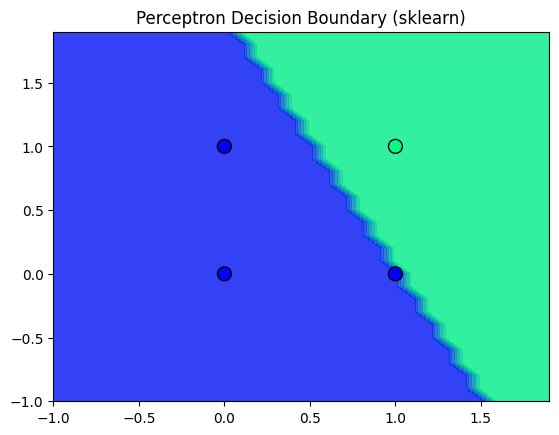

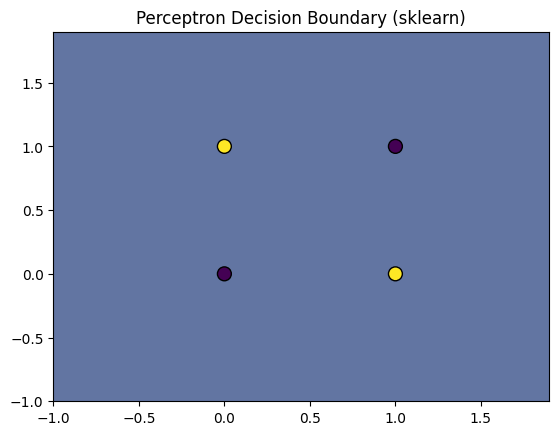

In [16]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

def generate_data(dataset_type):
    if dataset_type == 'OR':
        return np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 1])
    elif dataset_type == 'AND':
        return np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 0, 0, 1])
    elif dataset_type == 'XOR':
        return np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 0])


X_or, y_or = generate_data('OR')
X_and, y_and = generate_data('AND')
X_xor, y_xor = generate_data('XOR')


def train_perceptron(X, y):
    model = Perceptron(max_iter=1000, eta0=0.1)
    model.fit(X, y)
    return model


model_or = train_perceptron(X_or, y_or)
print("OR Data: Accuracy:", model_or.score(X_or, y_or))

model_and = train_perceptron(X_and, y_and)
print("AND Data: Accuracy:", model_and.score(X_and, y_and))

model_xor = train_perceptron(X_xor, y_xor)
print("XOR Data: Accuracy:", model_xor.score(X_xor, y_xor))

def plot_decision_boundary_sklearn(model, X, y, cmap='coolwarm'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap=cmap)
    plt.title("Perceptron Decision Boundary (sklearn)")
    plt.show()
plot_decision_boundary_sklearn(model_or, X_or, y_or, cmap='spring')
plot_decision_boundary_sklearn(model_and, X_and, y_and, cmap='winter')
plot_decision_boundary_sklearn(model_xor, X_xor, y_xor, cmap='viridis')


The perceptron correctly classifies the dataset because AND and OR is a linearly separable problem.
The perceptron fails for the XOR dataset, producing [0 0 0 0]. This result confirms that the single-layer perceptron cannot handle non-linear problems like XOR.

The **problem with a single-unit perceptron** lies in its inability to handle non-linearly separable problems, such as the XOR dataset .A single-unit perceptron can only solve problems where the data points can be separated by a single straight line (linear decision boundary).

For datasets like AND and OR (which are linearly separable), the perceptron works well.For non-linearly separable datasets like XOR, the perceptron fails because a single straight line cannot separate the classes.

3. Multiclass  classification task: Classify MNIST dataset  and analyze the result

In [8]:

import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

mnist, info = tfds.load('mnist', with_info=True, as_supervised=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [9]:
X, y = [], []

for image, label in mnist['train']:
    X.append(np.array(image, dtype=np.float32))
    y.append(label.numpy())


X = np.array(X)
y = np.array(y)

#range [0,1]
X = X / 255.0

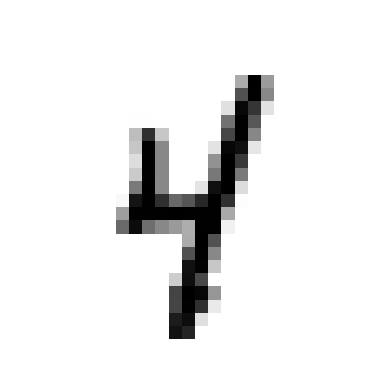

In [10]:

import matplotlib.pyplot as plt

def plot_digit(image_data):
    plt.imshow(image_data, cmap="binary")
    plt.axis("off")

# First digit from X
some_digit = X[0]
plot_digit(some_digit)

plt.show()

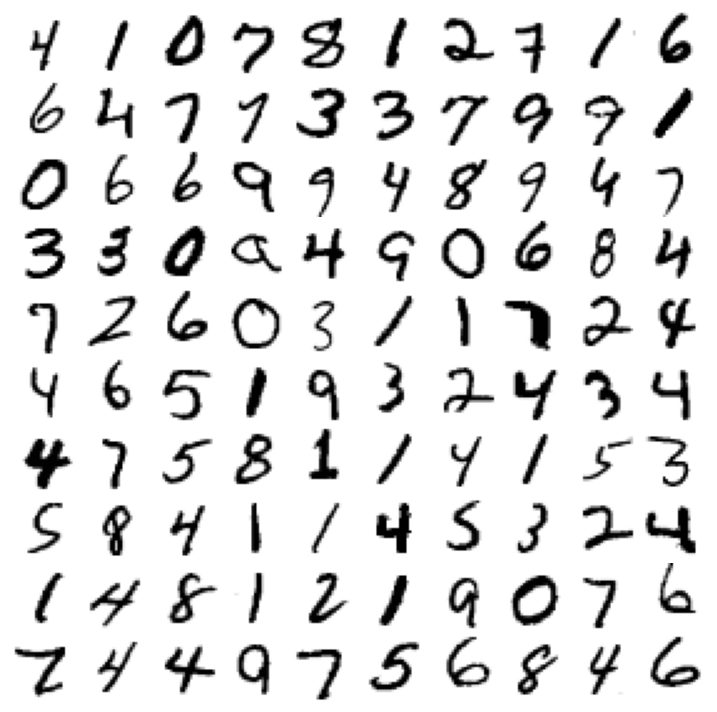

In [11]:

import matplotlib.pyplot as plt

def plot_digit(image_data):
    plt.imshow(image_data, cmap="binary")
    plt.axis("off")

# 1first 100 digits
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)


plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

In [12]:
mnist.keys()

dict_keys(['test', 'train'])

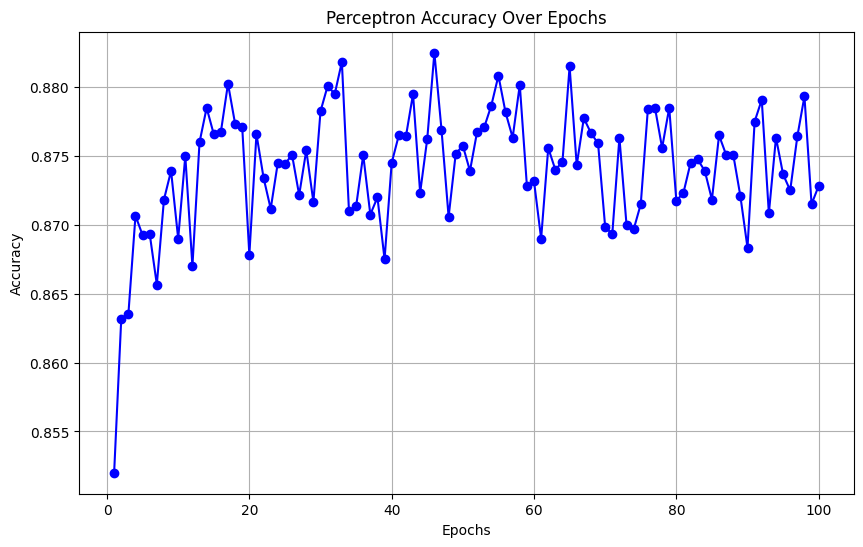

Final Perceptron Accuracy on Test Set: 0.8728333333333333


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(X.shape[0], -1), y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Perceptron(max_iter=1, eta0=0.1, warm_start=True)

accuracies = []
epochs = 100

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

for epoch in range(epochs):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)


plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), accuracies, marker='o', linestyle='-', color='b')
plt.title('Perceptron Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


print("Final Perceptron Accuracy on Test Set:", accuracies[-1])